# Setup

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
import tqdm

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [11]:
# # This is an example of plot (random data). You can change it if you want.

# ## Change the following lines
# periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
# freqs = np.linspace(0, 0.5, 200)
# ##


# fig, ax = fig_ax(figsize=(9, 5))

# avg = periodograms.mean(axis=0)
# std = periodograms.std(axis=0)
# ax.plot(freqs, avg, 'k-')
# ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


In [13]:
# Parameters of the simulation
n_samples = [200, 500, 1000]
sampling_freq = 1
n_simulations = 100

In [14]:
def auto_cov(X, t):
    """
    Compute the samp_autocovsariance of X at lag t.
    ----------
    Parameters
    ----------
    X : Data (array of shape (n,))
    t : Lag (int) 
    """
    n = X.shape[0]
    s = np.sum([X[i]*X[i+t] for i in range (0,n-t-1)])
    return 1/n*s 

100%|██████████| 100/100 [00:09<00:00, 10.67it/s]


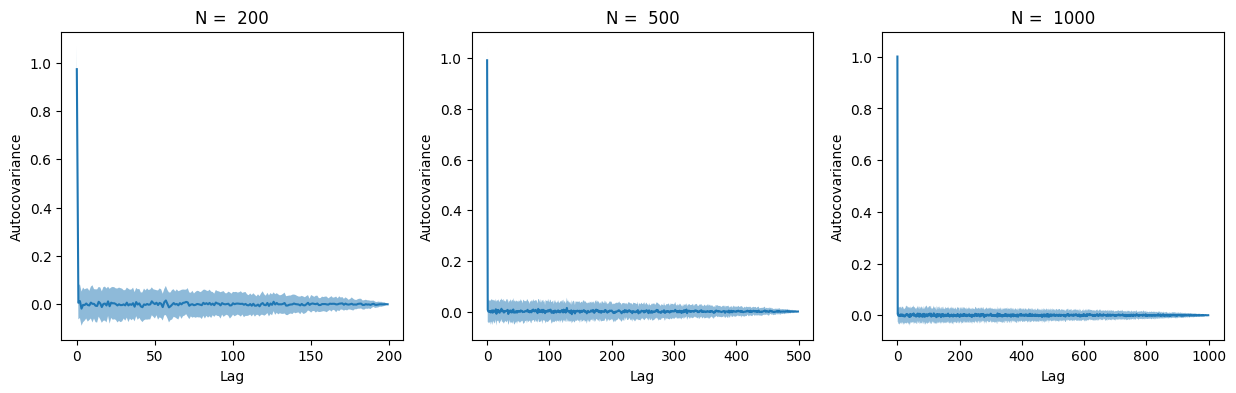

In [15]:
fig, ax = plt.subplots(1,len(n_samples), figsize=(15, 4))

for j, N in enumerate(n_samples):
    tau = np.arange(N)
    samp_autocovs = np.zeros((tau.shape[0], n_simulations)) # shape (lags, n_simulations)

    for i in tqdm.tqdm(range(n_simulations)):
        X = np.random.normal(0, 1, N)
        for t in (tau):
            samp_autocovs[t, i] = auto_cov(X, t)
        
    samp_autocov_mean = samp_autocovs.mean(axis=1)
    samp_autocov_std = samp_autocovs.std(axis=1)

    ax[j].title.set_text(f"N =  {N}")
    ax[j].plot(tau, samp_autocov_mean)
    ax[j].fill_between(tau, samp_autocov_mean - samp_autocov_std, samp_autocov_mean + samp_autocov_std, alpha=0.5)
    ax[j].set_xlabel("Lag")
    ax[j].set_ylabel("Autocovariance")

plt.show()

/var/folders/0m/07y4vn414bng8jcy4nv9qj900000gp/T/ipykernel_57411/1760747513.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  periodograms[i, l] = JFK(X, N, freq, tau)


(200,)
(500,)
(1000,)


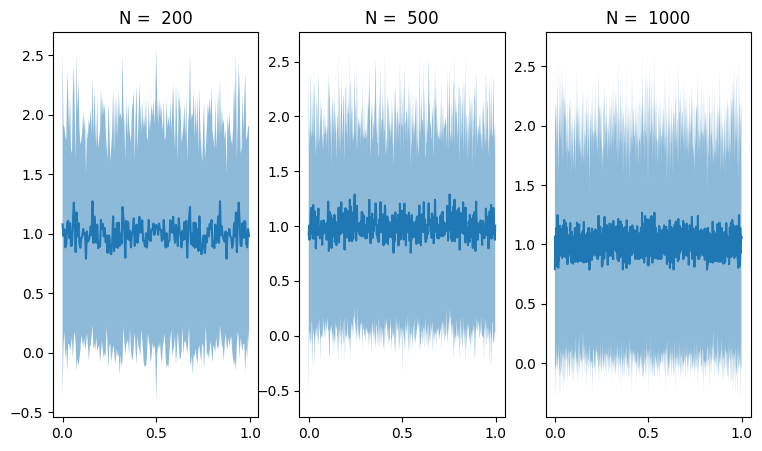

In [25]:
# Initial code was as follows but the running time was too long (>3h) due to JFK calling auto_cov for each value of tau

# n_samples = [200, 500, 1000]
# n_simulations = 100


# def JFK(X, n, f_k, tau): 
#     gamma_hat_zero = auto_cov(X, tau[0])
#     gamma_hat_positive = 0 
#     for i in range (tau.shape[0]):
#         gamma_hat_positive += auto_cov(X, tau[i]) * np.exp(2j * np.pi * tau[i] * f_k)
#     return 2 * gamma_hat_positive - gamma_hat_zero 


# fig, ax = plt.subplots(1,len(n_samples), figsize=(12, 5))

# for j, N in enumerate(n_samples):
#     f_k = np.array([sampling_freq*k/N for k in range(0,N)])
#     periodograms = np.random.randn(n_simulations, f_k.shape[0])  # shape (n_trials, n_freqs)
#     tau = np.arange(N)

#     for i in range(n_simulations):
#         X = np.random.normal(0, 1, N)
#         for l, freq in enumerate(f_k):
#             periodograms[i, l] = JFK(X, N, freq, tau) 
            
#     avg = periodograms.mean(axis=0)
#     std = periodograms.std(axis=0)

#     print(avg.shape)

#     ax[j].title.set_text(f"N =  {N}")
#     ax[j].plot(f_k, avg)
#     ax[j].fill_between(f_k, avg - std, avg + std, alpha=0.5)

# plt.show()

In [16]:
def periodogram(f, X, fs):
    """
    Compute the periodogram of X at frequency f.
    ----------
    Parameters
    ----------
    f : Frequency (float)
    X : Data (array of shape (n,))
    fs : Sampling frequency (float)
    """
    n = X.shape[0]
    s = 0
    for i in range (0,n):
        s += X[i] * np.exp(-2j * np.pi * f * i / fs)
    return 1/n * np.abs(s)**2

100%|██████████| 100/100 [00:02<00:00, 42.92it/s]


(200,)


100%|██████████| 100/100 [00:14<00:00,  7.01it/s]


(500,)


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


(1000,)


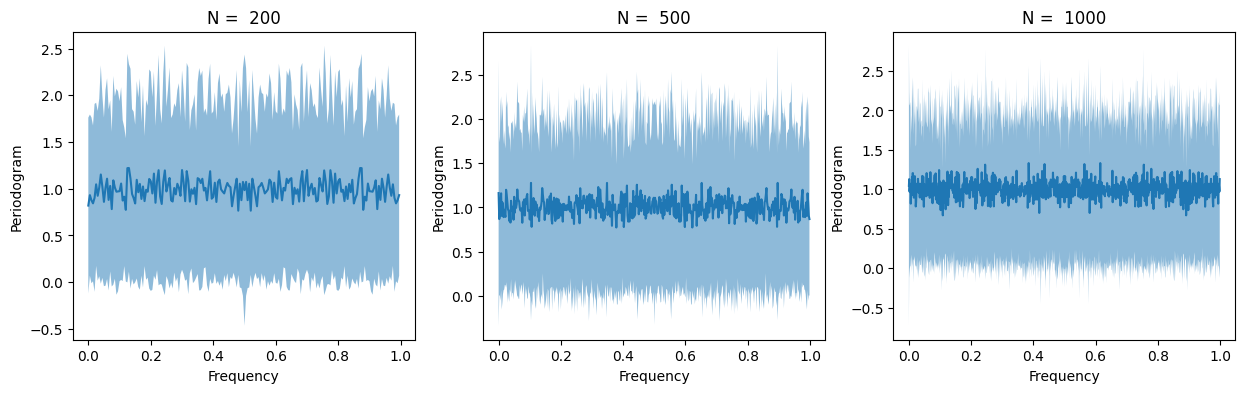

In [8]:
fig, ax = plt.subplots(1,len(n_samples), figsize=(15, 4))

for j, N in enumerate(n_samples):
    f_k = np.array([sampling_freq*k/N for k in range(0,N)])
    periodograms = np.random.randn(n_simulations, f_k.shape[0])  # shape (n_trials, n_freqs)
    tau = np.arange(N)

    for i in tqdm.tqdm(range(n_simulations)):
        X = np.random.normal(0, 1, N)
        for l, freq in enumerate(f_k):
            periodograms[i, l] = periodogram(freq, X, sampling_freq) 
            
    avg = periodograms.mean(axis=0)
    std = periodograms.std(axis=0)

    print(avg.shape)

    ax[j].title.set_text(f"N =  {N}")
    ax[j].plot(f_k, avg)
    ax[j].fill_between(f_k, avg - std, avg + std, alpha=0.5)
    ax[j].set_xlabel("Frequency")
    ax[j].set_ylabel("Periodogram")

plt.show()

## Question 9

In [18]:
# Number of sections
K = 5

In [19]:
def bartlett_estimate(K, f, X, fs):
    """
    Compute the Bartlett estimate of X at frequency f.
    ----------
    Parameters
    ----------
    K : Number of segments (int)
    X : Data (array of shape (n,))
    fs : Sampling frequency (float)
    """
    n = X.shape[0]
    N = int(n/K)
    s = 0
    for k in range (0, K):
        s += periodogram(f, X[k*N:(k+1)*N], fs)
    return 1/K * s

100%|██████████| 100/100 [00:02<00:00, 43.02it/s]


(200,)


100%|██████████| 100/100 [00:14<00:00,  6.95it/s]


(500,)


100%|██████████| 100/100 [00:56<00:00,  1.78it/s]

(1000,)


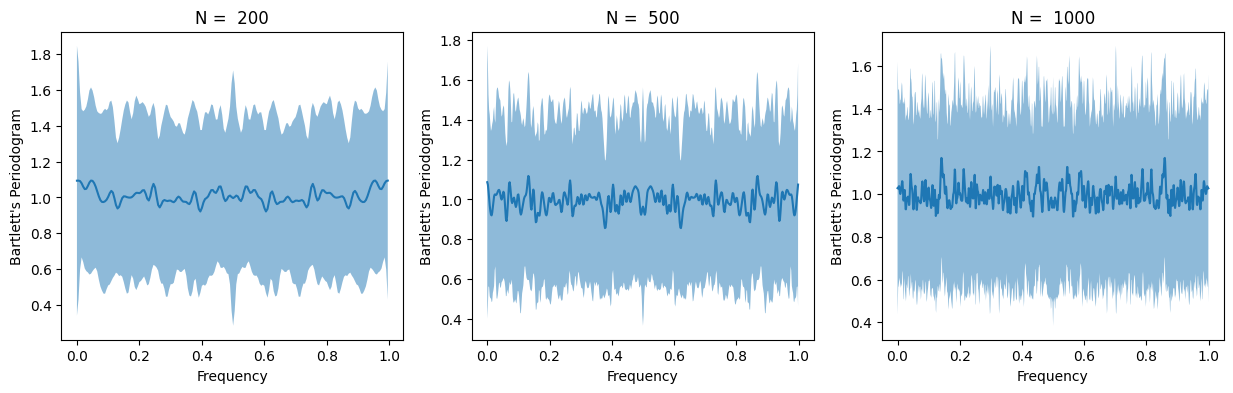

In [20]:
fig, ax = plt.subplots(1,len(n_samples), figsize=(15, 4))

for j, N in enumerate(n_samples):
    f_k = np.array([sampling_freq*k/N for k in range(0,N)])
    periodograms = np.random.randn(n_simulations, f_k.shape[0])  # shape (n_trials, n_freqs)
    tau = np.arange(N)

    for i in tqdm.tqdm(range(n_simulations)):
        X = np.random.normal(0, 1, N)
        for l, freq in enumerate(f_k):
            periodograms[i, l] = bartlett_estimate(K, freq, X, sampling_freq) 
            
    avg = periodograms.mean(axis=0)
    std = periodograms.std(axis=0)

    print(avg.shape)

    ax[j].title.set_text(f"N =  {N}")
    ax[j].plot(f_k, avg)
    ax[j].fill_between(f_k, avg - std, avg + std, alpha=0.5)
    ax[j].set_xlabel("Frequency")
    ax[j].set_ylabel("Bartlett's Periodogram")

plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [3]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

In [4]:
# We need to pad the steps with zeros so that they all have the same length when training the model

def fill_zeros(s, max_len):
    s_len = len(s)
    to_fill = [0] * (max_len - s_len)
    as_list = list(s) + to_fill
    return as_list

max_len_train = max([len(s) for s in X_train])
max_len_test = max([len(s) for s in X_test])
max_len = max_len_train
if max_len_test > max_len_train:
    max_len = max_len_test

X_train_filled = [fill_zeros(s, max_len) for s in X_train]
X_train_filled = np.array(X_train_filled)

X_test_filled = [fill_zeros(s, max_len) for s in X_test]
X_test_filled = np.array(X_test_filled)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from dtw import dtw

def get_dtw_distance(signal1, signal2)->float:
    alignment = dtw(signal1, signal2, keep_internals=True)
    return alignment.distance    

clf = KNeighborsClassifier(metric = get_dtw_distance)
param_grid = {"n_neighbors": np.arange(2, 10)}
knn_gscv = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
knn_gscv.fit(X_train_filled , y_train)
k = knn_gscv.best_params_['n_neighbors']
print("best k-param selected:", k)


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

best k-param selected: 5


In [6]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors = k, metric = get_dtw_distance)
knn.fit(X_train_filled, y_train)
y_pred_train = knn.predict(X_train_filled)
y_pred_test = knn.predict(X_test_filled)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print(f"The F-1 score for 5-NN model on the training set is {f1_train}")
print(f"The F-1 score for 5-NN model on the test set is {f1_test}")

The F-1 score for 5-NN model on the training set is 0.8860759493670887
The F-1 score for 5-NN model on the test set is 0.45045045045045046


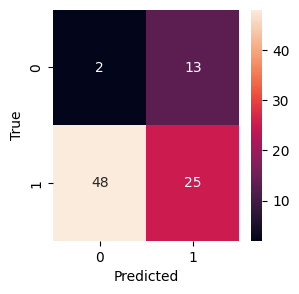

Precision: 0.6578947368421053
Recall: 0.3424657534246575


In [7]:
cm = confusion_matrix(y_test, y_pred_test)
fig = plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))

## Question 11

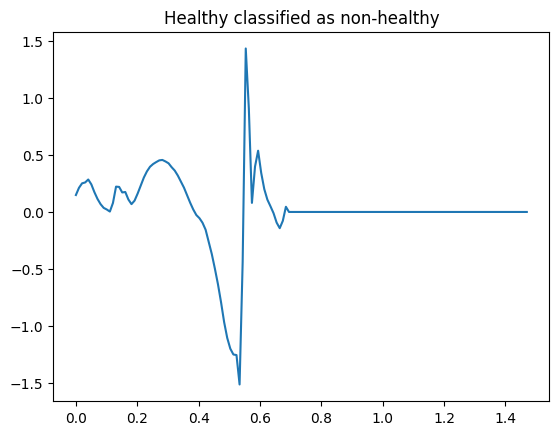

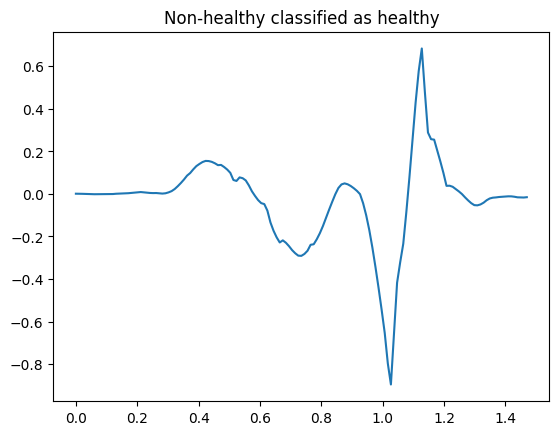

In [8]:
mislabeled = np.where(y_pred_test != y_test)[0]
healthy_as_non = []
non_as_healthy = []
for m in mislabeled :
    if y_test[m] == 0:
        healthy_as_non.append(m)
    else : 
        non_as_healthy.append(m)



X_healthy_as_non = X_test_filled[healthy_as_non[0]]
X_non_as_healthy = X_test_filled[non_as_healthy[0]]
x = np.linspace(0, max_len/100, max_len)
fig , ax = plt.subplots(1,1)
ax.plot(x,X_healthy_as_non)
ax.set_title('Healthy classified as non-healthy')
fig1 , ax1 = plt.subplots(1,1)
ax1.plot(x,X_non_as_healthy)
ax1.set_title('Non-healthy classified as healthy')
plt.show()